### Kaggle competition : Bike sharing demand 

##### Description
###### 1. datetime - hourly date + timestamp  
###### 2. season - 1 = spring, 2 = summer, 3 = fall, 4 = winter  
###### 3. holiday - whether the day is considered a holiday  
###### 4. workingday - whether the day is neither a weekend nor holiday  

###### 5. weather  
######   ----- 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
######   ----- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
######   ----- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
######   ----- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  

###### 6. temp - temperature in Celsius  
###### 7. atemp - "feels like" temperature in Celsius  
###### 8. humidity - relative humidity  
###### 9. windspeed - wind speed  
###### 10. casual - number of non-registered user rentals initiated  
###### 11. registered - number of registered user rentals initiated  
###### 12. count - number of total rentals  

In [1]:
pip install --upgrade --user matplotlib

Requirement already up-to-date: matplotlib in c:\users\youngboo.choi\appdata\roaming\python\python37\site-packages (3.1.3)
Note: you may need to restart the kernel to use updated packages.


In [2]:
### import the basic libraries 
import numpy as np 
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
### graphic setting 
%matplotlib inline 
sns.set(style='darkgrid')

In [4]:
### get data (with 'parse_dates' option) 
train = pd.read_csv('data/train.csv', parse_dates = ['datetime'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [5]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
## There is no missing value
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
## split the 'datetime'
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'second'),
 Text(0.5, 1.0, 'Count by Second')]

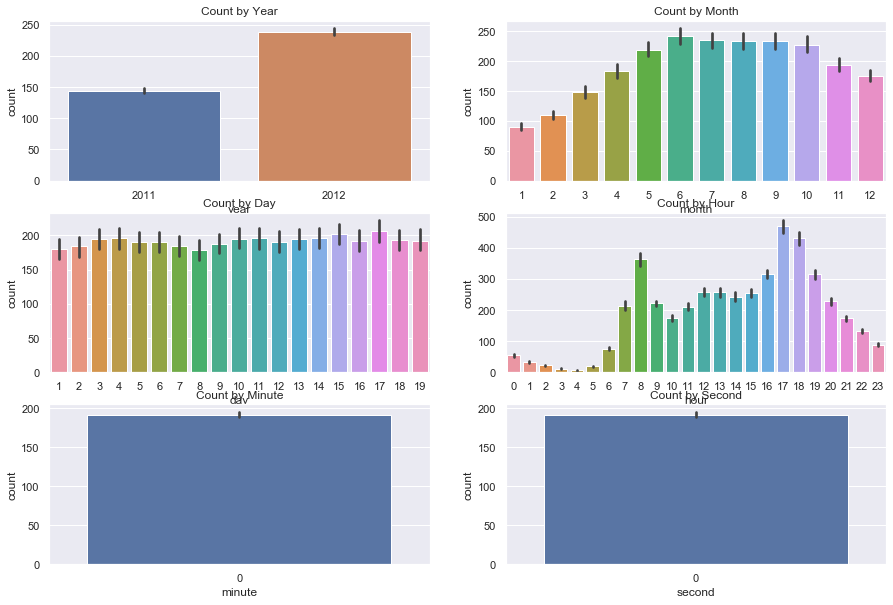

In [8]:
## Quick review whit charts 
## make 6 charts -> 3 x 2 panels, 15 x 10 size
figure, ((ax1,ax2), (ax3, ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(15,10)

## make 6 charts -> set the Title & x/y lable
sns.barplot(data=train, x = 'year', y = 'count', ax=ax1)
ax1.set(title = 'Count by Year', xlabel = 'year', ylabel = 'count')

sns.barplot(data=train, x = 'month', y = 'count', ax=ax2)
ax2.set(title = 'Count by Month', xlabel = 'month', ylabel = 'count')

sns.barplot(data=train, x = 'day', y = 'count', ax=ax3)
ax3.set(title = 'Count by Day', xlabel = 'day', ylabel = 'count')

sns.barplot(data=train, x = 'hour', y = 'count', ax=ax4)
ax4.set(title = 'Count by Hour', xlabel = 'hour', ylabel = 'count')

sns.barplot(data=train, x = 'minute', y = 'count', ax=ax5)
ax5.set(title = 'Count by Minute', xlabel = 'minute', ylabel = 'count')

sns.barplot(data=train, x = 'second', y = 'count', ax=ax6)
ax6.set(title = 'Count by Second', xlabel = 'second', ylabel = 'count')

##### Findings by quick view 
###### 1. Rental counts increased in yr.2011. (than yr.2011)
###### 2. Rental counts increased in summer season. 
###### 3. Rental counts increased on commute time.
###### 4. There are some data issues. 
######  - The 'day' have only 1~19. 
######  - The all of 'minute' and 'second' is zero.

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'workingday'),
 Text(0.5, 1.0, 'R.count by workingday')]

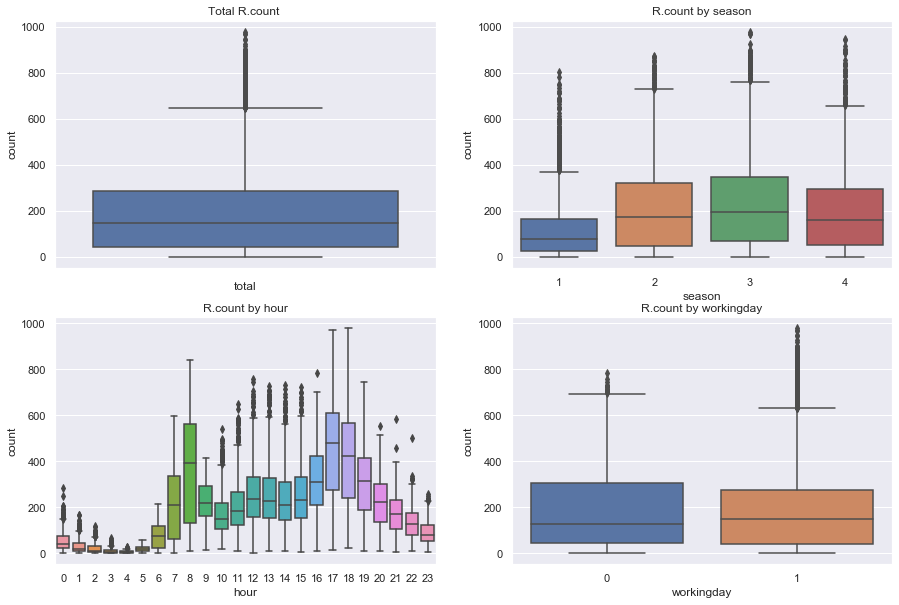

In [9]:
## review the distribution of Rental counts
## make 4 charts -> 2 x 2 panels, 15 x 10 size, title and lable setting 
figure, ((ax1,ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,10)

sns.boxplot(data = train, y ='count', ax = ax1)
ax1.set(xlabel = 'total', ylabel = 'count', title = 'Total R.count ')

sns.boxplot(data = train, x = 'season', y ='count', ax = ax2)
ax2.set(xlabel = 'season', ylabel = 'count', title = 'R.count by season')

sns.boxplot(data = train, x = 'hour', y ='count', ax = ax3)
ax3.set(xlabel = 'hour', ylabel = 'count', title = 'R.count by hour')

sns.boxplot(data = train, x = 'workingday', y ='count', ax = ax4)
ax4.set(xlabel = 'workingday', ylabel = 'count', title = 'R.count by workingday')

In [10]:
## make the new variable : dayofweek
train['dayofweek'] = train['datetime'].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'hour'),
 Text(0.5, 1.0, 'R.count by hour: season')]

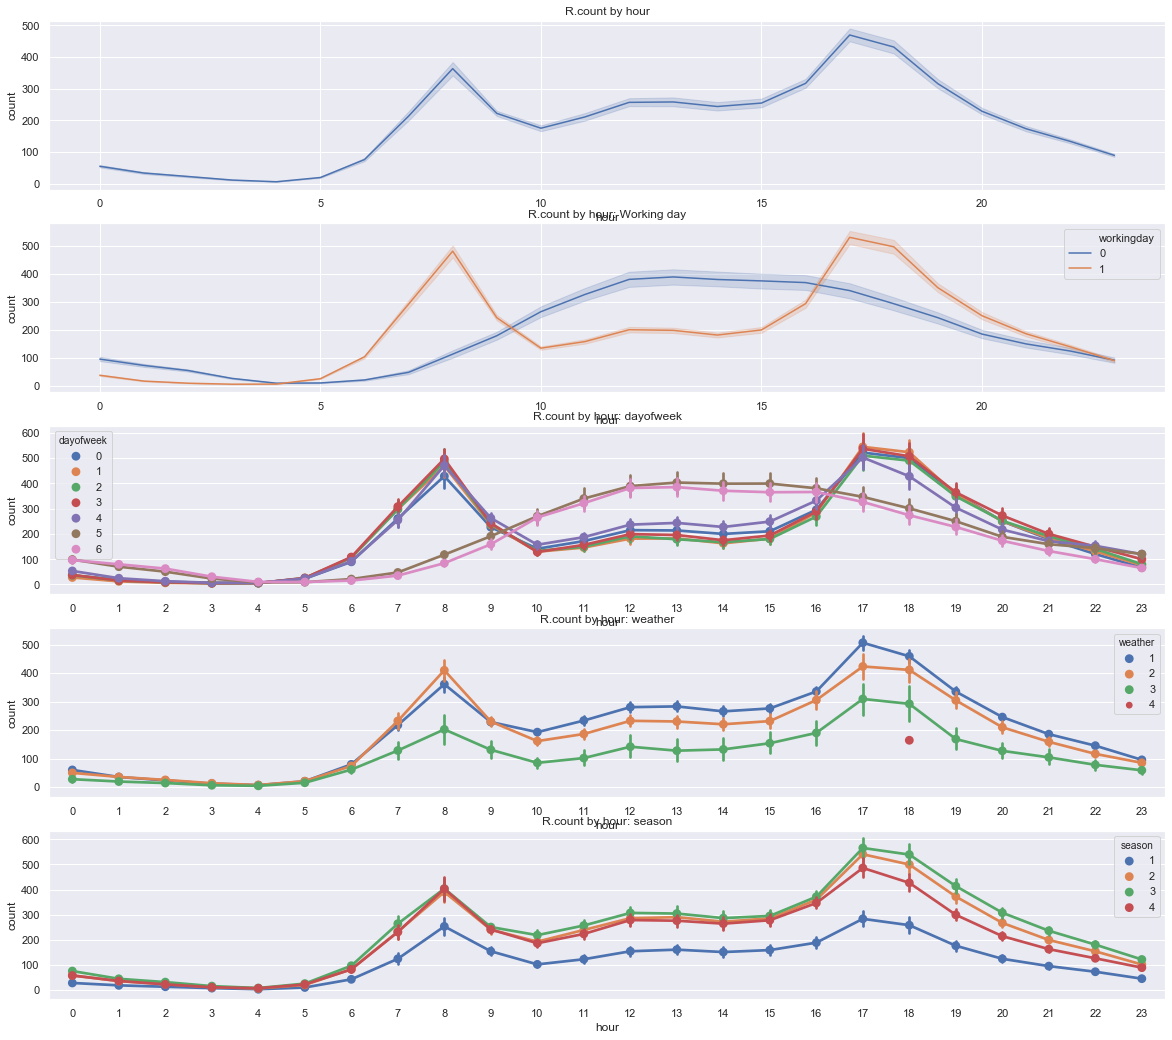

In [26]:
## R.count trend review (use 'hue' option to add condition)
figure, (ax1,ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
figure.set_size_inches(20,18)

sns.lineplot(data = train, y='count', x= 'hour', ax=ax1)
ax1.set(title = 'R.count by hour', ylabel='count', xlabel = 'hour')

sns.lineplot(data = train, y='count', x= 'hour', hue='workingday', ax=ax2)
ax2.set(title = 'R.count by hour: Working day', ylabel='count', xlabel = 'hour')

sns.pointplot(data = train, y='count', x= 'hour', hue='dayofweek', ax=ax3)
ax3.set(title = 'R.count by hour: dayofweek', ylabel='count', xlabel = 'hour')

sns.pointplot(data = train, y='count', x= 'hour', hue='weather', ax=ax4)
ax4.set(title = 'R.count by hour: weather', ylabel='count', xlabel = 'hour')

sns.pointplot(data = train, y='count', x= 'hour', hue='season', ax=ax5)
ax5.set(title = 'R.count by hour: season', ylabel='count', xlabel = 'hour')

##### Findings 
###### 1. working day and not-working day's pattern is different (week day & weekend)
###### 2. R.count is decreas in bad weather (3: light rain/snow, 4: heavy rain/snow) 
###### 3. R.count in season (1:spring < 4:winter < 2:summer < 3:fall) 

In [12]:
## correlation of the variables 
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


In [13]:
corr_matt = train [['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']]
corr_matt.corr()

,temp,atemp,humidity,windspeed,casual,registered,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948
count,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000


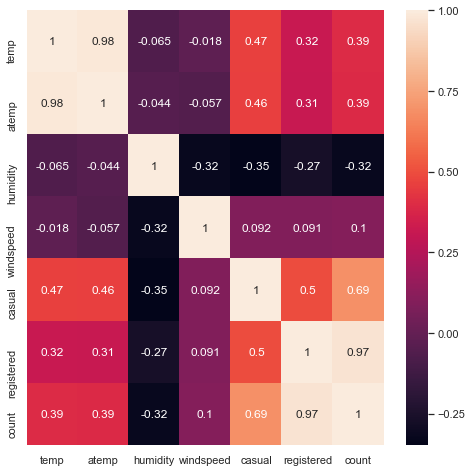

In [14]:
## make the heat-map 
corr_matt2 = corr_matt.corr()   ### making the corr matrix for heat-map 
plt.figure(figsize=(8, 8))      ### setting the chart size 

sns.heatmap(corr_matt2, annot=True)     ### show the corr-coefficient with 'annotate' option 

##### Findings 
###### 1. most powerful to count --> registered 
###### 2. the relation-ships in 'temp / humidity / windspeed' are very low   
###### 3. temp and atemp are very similar 

[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'windspeed'),
 Text(0.5, 1.0, 'windspeed x count')]

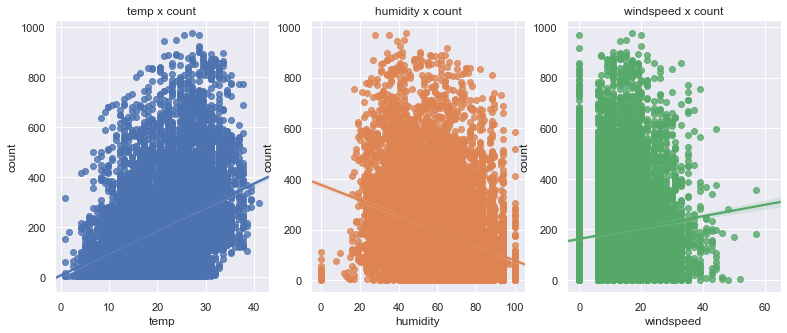

In [23]:
## plotting (R.count x temp / humidity / windspeed)  
figure,(ax1,ax2, ax3) = plt.subplots(ncols=3)
figure.set_size_inches(13,5)

sns.regplot(data=train, x='temp', y='count', ax=ax1)
ax1.set(title= 'temp x count', xlabel='temp', ylabel='count')
sns.regplot(data=train, x='humidity', y='count', ax=ax2)
ax2.set(title= 'humidity x count', xlabel='humidity', ylabel='count')
sns.regplot(data=train, x='windspeed', y='count', ax=ax3)
ax3.set(title= 'windspeed x count', xlabel='windspeed', ylabel='count')

###### in windspeed, there are so many '0'!!

In [16]:
## make 'year_month' with 'year' and 'month' 
def concatenate_year_month(datetime) : 
    return '{0}-{1}'.format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)
train.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0,2,2012-12
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0,2,2012-12
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0,2,2012-12
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0,2,2012-12
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,2012,12,19,23,0,0,2,2012-12


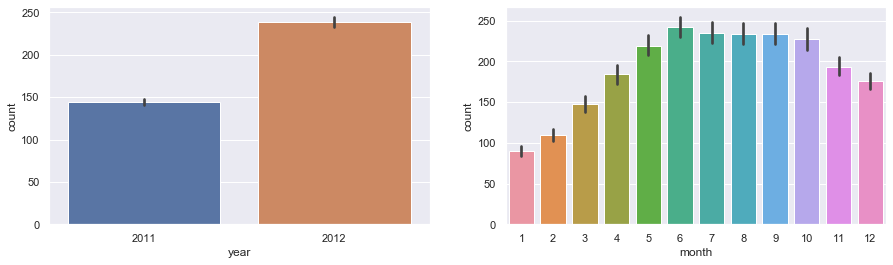

In [17]:
figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)

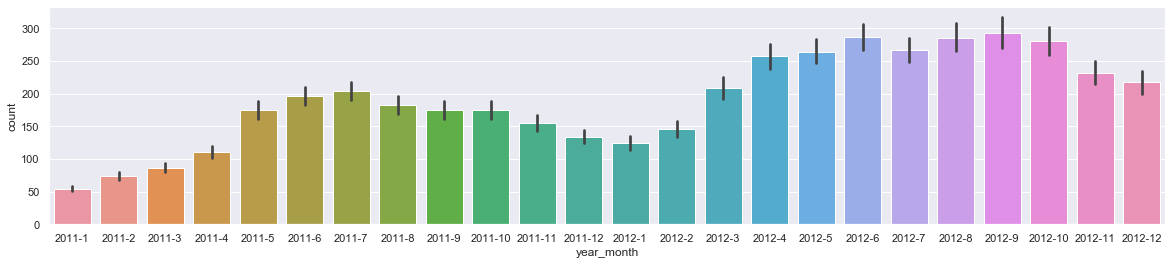

In [18]:
plt.figure(figsize=(20, 4)) 
sns.barplot(data=train, x='year_month', y='count')

In [19]:
## remove outlier 
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([  1,   1,   1, ..., 968, 970, 977], dtype=int64)),
 (169.82942673231383, 191.5741319125482, 0.9372682766213174))

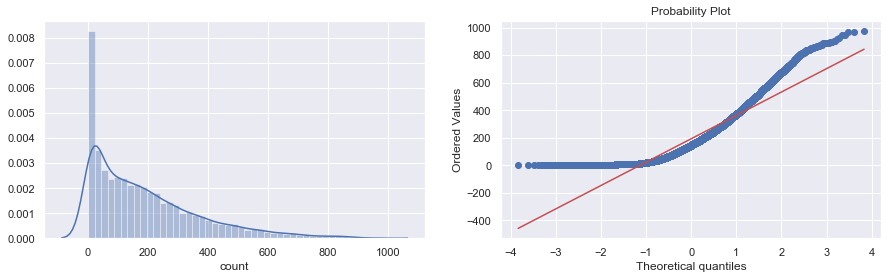

In [20]:
## check the distribution 
from scipy import stats 
figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)

sns.distplot(train['count'], ax=ax1)
stats.probplot(train['count'], plot=ax2)

###### distribution of count is skewed (becasue of so may zero('0'))

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.        , 0.        , 0.        , ..., 6.59578051, 6.5971457 ,
         6.59850903])),
 (1.4096846101542908, 4.523106928071492, 0.9537631807794263))

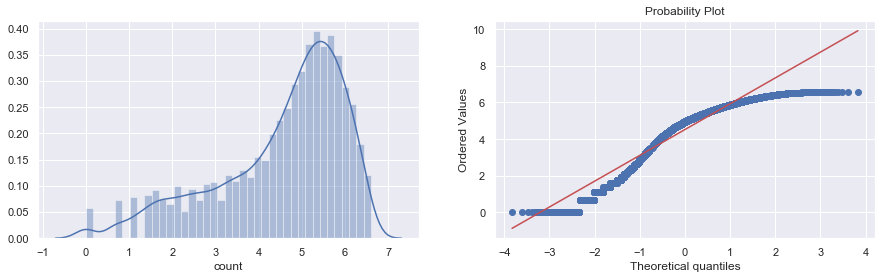

In [21]:
## close to normal distribution (with log)
figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,4)

sns.distplot(np.log(trainWithoutOutliers['count']), ax=ax1)
stats.probplot(np.log(trainWithoutOutliers['count']), plot=ax2)

#### Summary 
##### 1.EDA 
###### - datetime 변수를 시간 타입으로 인식시킨 후, 분석의 편의를 위해 연/월/일/시/분/초로 분할
###### - 확인결과 분, 초는 기록되지 않았음 --> 분석에 사용 불가 
###### - 일(day)를 dayofweek 함수를 사용하여 요일로 변환 
###### - 분석 편의를 위해, 연과 일을 합쳐 연월(year_month) 변수 추가 

##### 2. Findings
###### - 2011년에 비해 2012년의 자전가 대여량 증가 
###### - 따뜻한 계절에 대여량 증가 (가을 > 여름 > 겨울 > 봄 순서)
###### - 평일은 출퇴근 시간(오전 7-9시, 오후 5-7시)에 대여량 증가, 반면 휴일은 오전 10시-오후7시 사이에 대여량 증가 
###### - 대여량과 상관관계가 가장 높은 것은 '등록'(registered) 여부 

##### 3. issues 
###### - 3.1 기온과 체감온도(temp, atemp)는 상호 연관성이 너무 높아 분석시 주의 필요 
###### - 3.2 일(day)는 1~19일까지 밖에 기록되어 있지 않음 
###### - 3.3 대여량(count), 풍속(windspeed)는 0값이 너무 많음. 대여량(count)는 outlier 제거 후 log변환하니, 비교적 정규분포에 근접해 졌으나, 우측으로 치우치는 경향성을 갖게 되었음  